In [1]:
import numpy as np

# Load the npz file
data = np.load("/content/jester-v1-validation.npz")

# Access each array
scores = data['scores']
labels = data['labels']
predictions = data['predictions']
cf = data['cf']

# Check the shape of each array
print(f"Scores shape: {scores.shape}")
print(f"Labels shape: {labels.shape}")
print(f"Predictions shape: {predictions.shape}")
print(f"Confusion matrix (cf) shape: {cf.shape}")


Scores shape: (7047, 1, 1, 27)
Labels shape: (7047,)
Predictions shape: (7047,)
Confusion matrix (cf) shape: (27, 27)


In [6]:
sample_index = 0
print(f"Scores for sample {sample_index}: {scores[sample_index].flatten()}")

Scores for sample 0: [ 16.119448    35.435265    -1.6959107  -10.715737    -9.4597845
  -3.4519687    1.3484756   -0.41255647   0.09428459  12.142352
   0.7437538   -8.606332   -11.172374     1.2607615   -2.8482974
   9.250897   -13.289316   -15.645525    -4.213409    -5.104621
  -7.041338     2.2151198   -1.210651     4.772859     2.3997216
   0.46817526   0.12285081]


In [7]:
from scipy.special import softmax

probs = softmax(scores[sample_index].flatten())
print(f"Probabilities for sample {sample_index}: {probs}")

Probabilities for sample 0: [4.08551948e-09 1.00000000e+00 7.48402379e-17 9.05471804e-21
 3.17927030e-20 1.29267386e-17 1.57143342e-15 2.70078149e-16
 4.48339727e-16 7.65626659e-11 8.58358942e-16 7.46411208e-20
 5.73534321e-21 1.43946717e-15 2.36407044e-17 4.24886992e-12
 6.90532738e-22 6.54479081e-23 6.03670124e-18 2.47600180e-18
 3.56982330e-19 3.73829690e-15 1.21585240e-16 4.82488161e-14
 4.49621013e-15 6.51606617e-16 4.61332630e-16]


In [8]:
correct = labels == predictions
accuracy = np.sum(correct) / len(labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 87.70%


In [9]:
from sklearn.metrics import classification_report

report = classification_report(labels, predictions, labels=range(27))
print(report)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       713
           1       0.78      0.99      0.87       257
           2       0.99      0.32      0.48       256
           3       0.91      0.89      0.90       250
           4       0.96      0.93      0.95       233
           5       0.86      0.91      0.88       246
           6       0.93      0.90      0.92       241
           7       0.87      0.88      0.88       239
           8       0.88      0.87      0.87       244
           9       0.73      0.97      0.83       245
          10       0.81      0.88      0.84       249
          11       0.88      0.85      0.86       246
          12       0.90      0.84      0.87       242
          13       0.83      0.88      0.85       244
          14       0.97      0.77      0.86       259
          15       0.90      0.85      0.88       248
          16       0.76      0.87      0.81       247
          17       0.76    

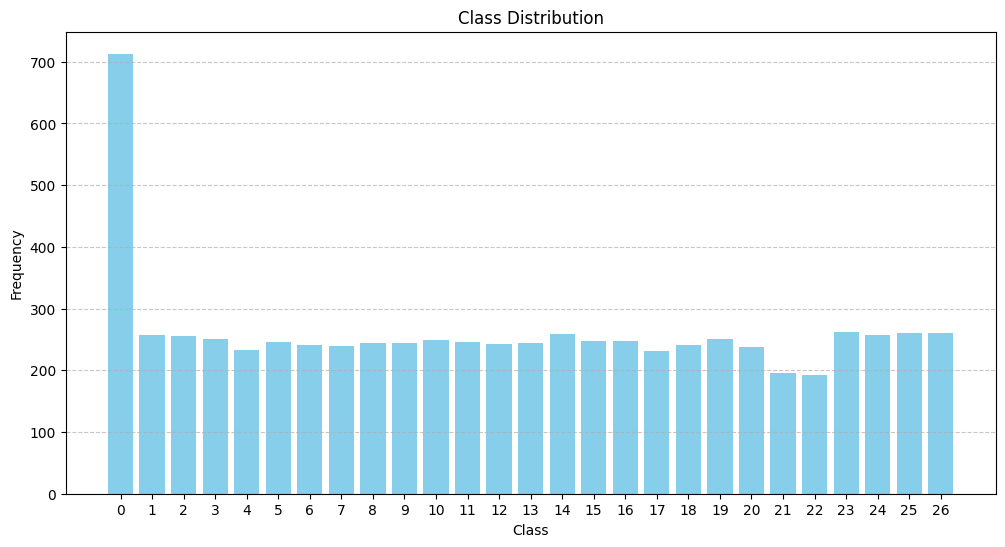

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Extract labels
labels = data['labels']

# Count occurrences of each class
class_counts = np.bincount(labels, minlength=27)

# Plot class distribution
plt.figure(figsize=(12, 6))
plt.bar(range(27), class_counts, color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(range(27))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


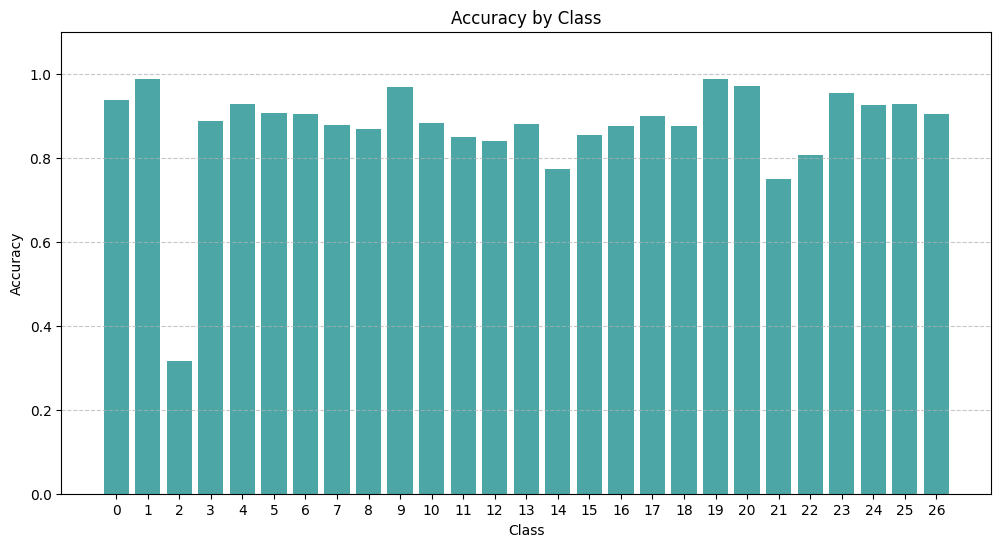

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Extract predictions, labels, and scores
predictions = data['predictions']
labels = data['labels']

# Calculate class-wise accuracy
num_classes = 27
class_correct = np.zeros(num_classes)
class_total = np.zeros(num_classes)

for label, pred in zip(labels, predictions):
    class_total[label] += 1
    if label == pred:
        class_correct[label] += 1

# Avoid division by zero for classes with no instances
class_accuracy = np.divide(class_correct, class_total, out=np.zeros_like(class_correct), where=class_total != 0)

# Plot the accuracy by class
plt.figure(figsize=(12, 6))
plt.bar(range(num_classes), class_accuracy, color='teal', alpha=0.7)
plt.title('Accuracy by Class')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.xticks(range(num_classes))
plt.ylim(0, 1.1)  # Accuracy ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


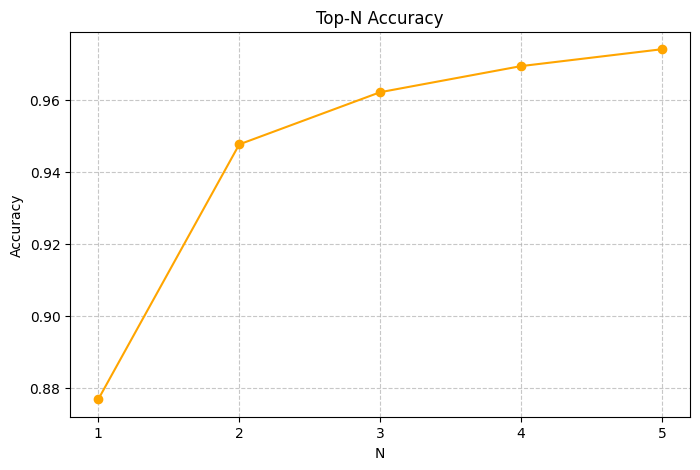

In [19]:
# Extract predictions and scores
scores = data['scores'].reshape(-1, 27)
labels = data['labels']

# Sort predictions by scores in descending order
sorted_preds = np.argsort(scores, axis=1)[:, ::-1]

# Calculate Top-N accuracy
top_n_accuracies = []
for n in range(1, 6):  # Top-1 to Top-5
    top_n_correct = np.any(sorted_preds[:, :n] == labels[:, None], axis=1).sum()
    top_n_accuracy = top_n_correct / len(labels)
    top_n_accuracies.append(top_n_accuracy)

# Plot Top-N accuracy
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), top_n_accuracies, marker='o', color='orange')
plt.title('Top-N Accuracy')
plt.xlabel('N')
plt.ylabel('Accuracy')
plt.xticks(range(1, 6))
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


Scores shape: (7047, 1, 1, 27)
Confusion Matrix shape: (27, 27)
Predictions shape: (7047,)
Labels shape: (7047,)


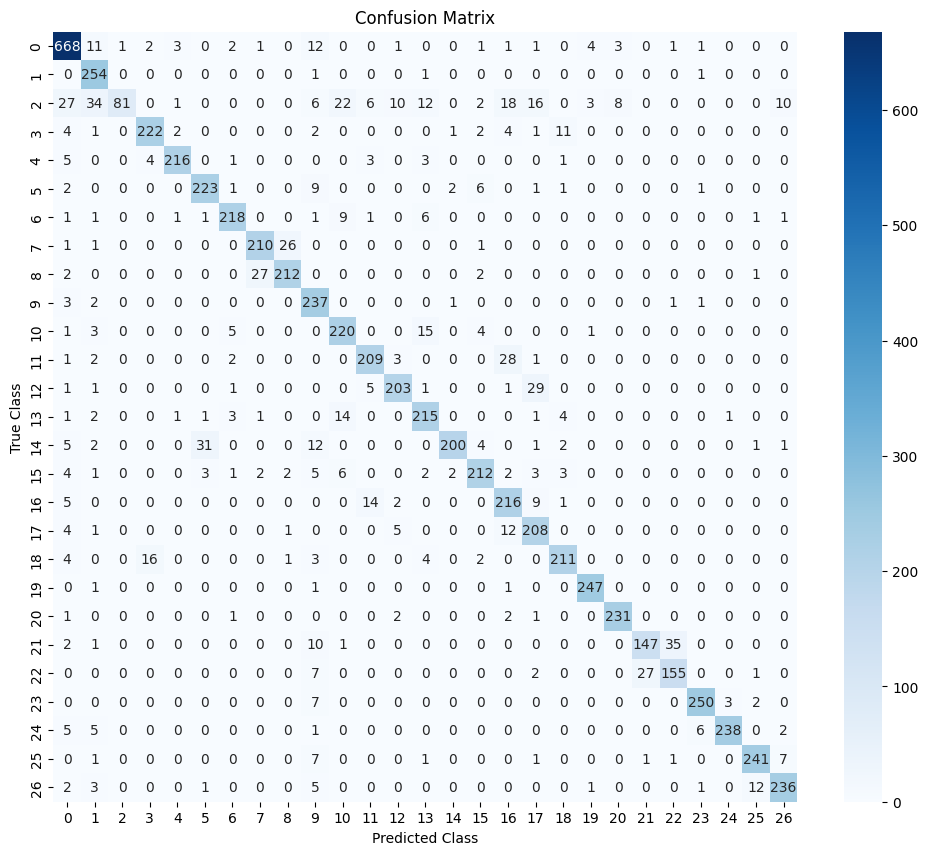

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Extract arrays from the .npz file
scores = data['scores']  # shape (10, 1, 1, 27)
cf = data['cf']          # shape (27, 27)
predictions = data['predictions']  # shape (10,)
labels = data['labels']  # shape (10,)

# Print the shapes of the loaded arrays
print(f"Scores shape: {scores.shape}")
print(f"Confusion Matrix shape: {cf.shape}")
print(f"Predictions shape: {predictions.shape}")
print(f"Labels shape: {labels.shape}")

# Calculate confusion matrix from predictions and labels
cm = confusion_matrix(labels, predictions)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=range(27), yticklabels=range(27))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


Scores shape: (7047, 1, 1, 27)
Confusion Matrix shape: (27, 27)
Predictions shape: (7047,)
Labels shape: (7047,)


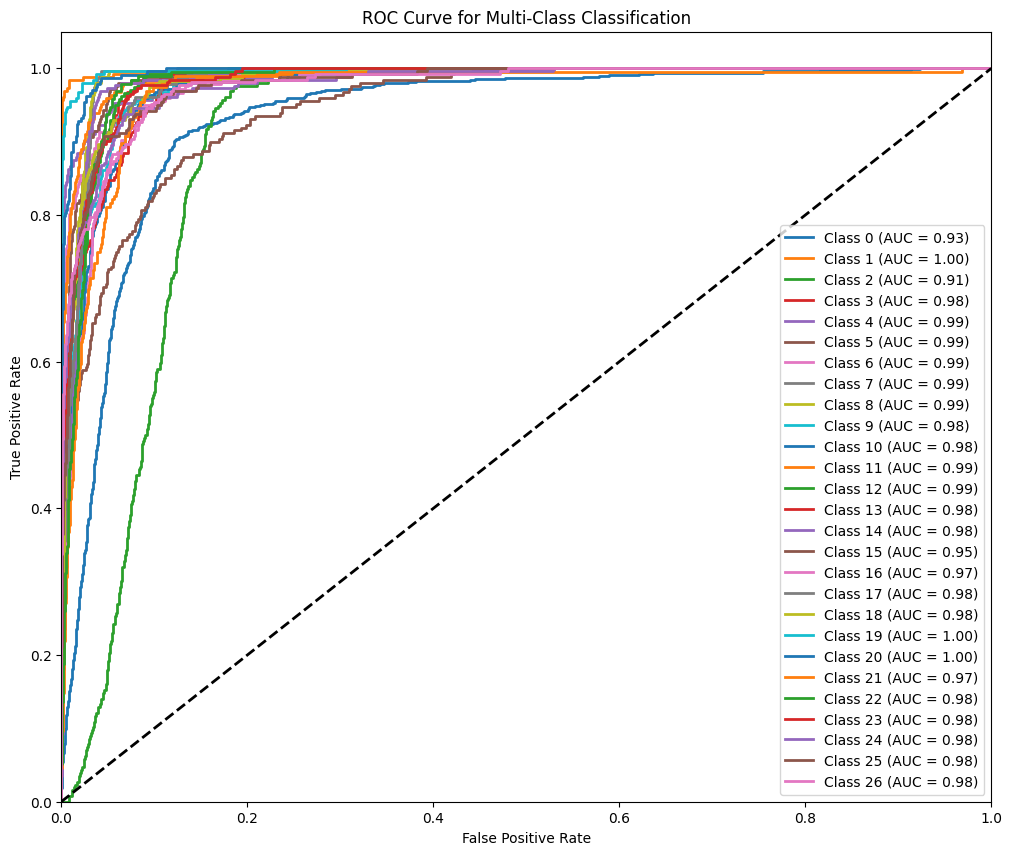

In [15]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Extract arrays from the .npz file
scores = data['scores']  # shape (10, 1, 1, 27)
cf = data['cf']          # shape (27, 27)
predictions = data['predictions']  # shape (10,)
labels = data['labels']  # shape (10,)

# Print the shapes of the loaded arrays
print(f"Scores shape: {scores.shape}")
print(f"Confusion Matrix shape: {cf.shape}")
print(f"Predictions shape: {predictions.shape}")
print(f"Labels shape: {labels.shape}")

# Flatten the scores and labels to be compatible for ROC curve calculation
scores = scores.reshape(-1, 27)  # Flatten scores to shape (10, 27)
lb = LabelBinarizer()
labels_binarized = lb.fit_transform(labels)  # Binarize the labels

# Calculate the ROC curve for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(27):  # 27 classes
    fpr[i], tpr[i], _ = roc_curve(labels_binarized[:, i], scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(12, 10))

for i in range(27):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line (chance level)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='best')
plt.show()


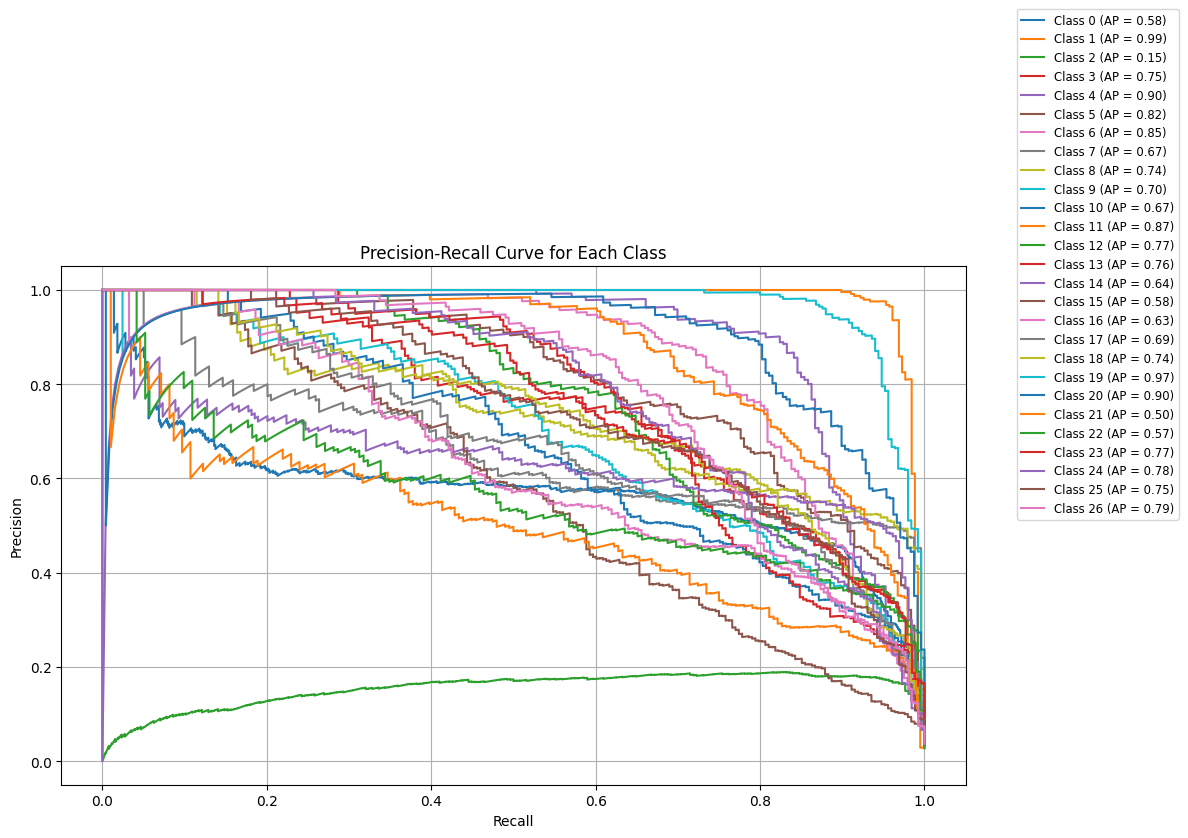

In [17]:
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Extract the arrays
scores = data['scores']  # shape (10, 1, 1, 27)
labels = data['labels']  # shape (10,)

# Reshape scores and labels for multi-class precision-recall calculation
scores = scores.reshape(-1, scores.shape[-1])  # shape (10, 27)
labels = np.eye(scores.shape[1])[labels]  # Convert to one-hot encoding, shape (10, 27)

# Initialize variables for macro-average Precision-Recall
precision_dict = {}
recall_dict = {}
average_precision_dict = {}

# Calculate Precision-Recall curve for each class
for i in range(scores.shape[1]):  # Iterate through classes
    precision, recall, _ = precision_recall_curve(labels[:, i], scores[:, i])
    average_precision = average_precision_score(labels[:, i], scores[:, i])

    precision_dict[i] = precision
    recall_dict[i] = recall
    average_precision_dict[i] = average_precision

# Plot the Precision-Recall curve for each class
plt.figure(figsize=(12, 8))
for i in range(scores.shape[1]):
    plt.plot(
        recall_dict[i],
        precision_dict[i],
        label=f'Class {i} (AP = {average_precision_dict[i]:.2f})'
    )

# Add plot details
plt.title('Precision-Recall Curve for Each Class')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left', bbox_to_anchor=(1.05, 0.5), fontsize='small')
plt.grid()
plt.tight_layout()
plt.show()


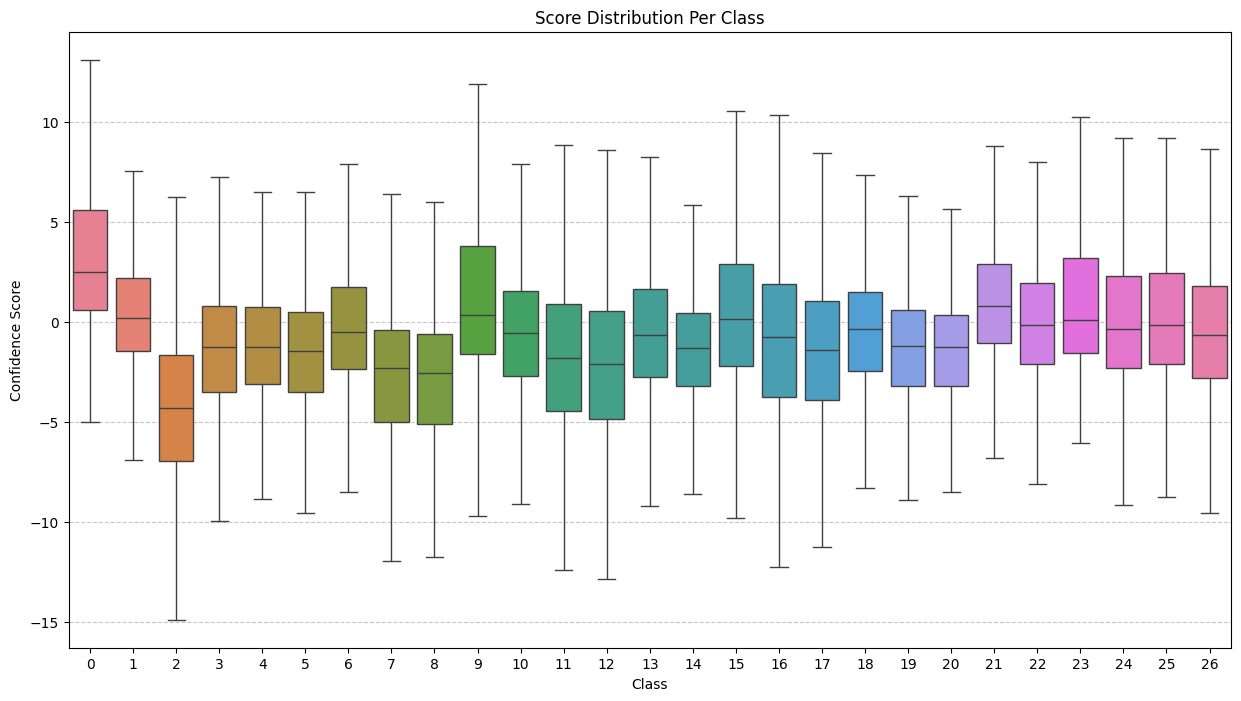

In [20]:
import seaborn as sns

# Extract scores
scores = data['scores'].reshape(-1, 27)

# Plot score distribution
plt.figure(figsize=(15, 8))
sns.boxplot(data=scores, showfliers=False)
plt.title('Score Distribution Per Class')
plt.xlabel('Class')
plt.ylabel('Confidence Score')
plt.xticks(range(27))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


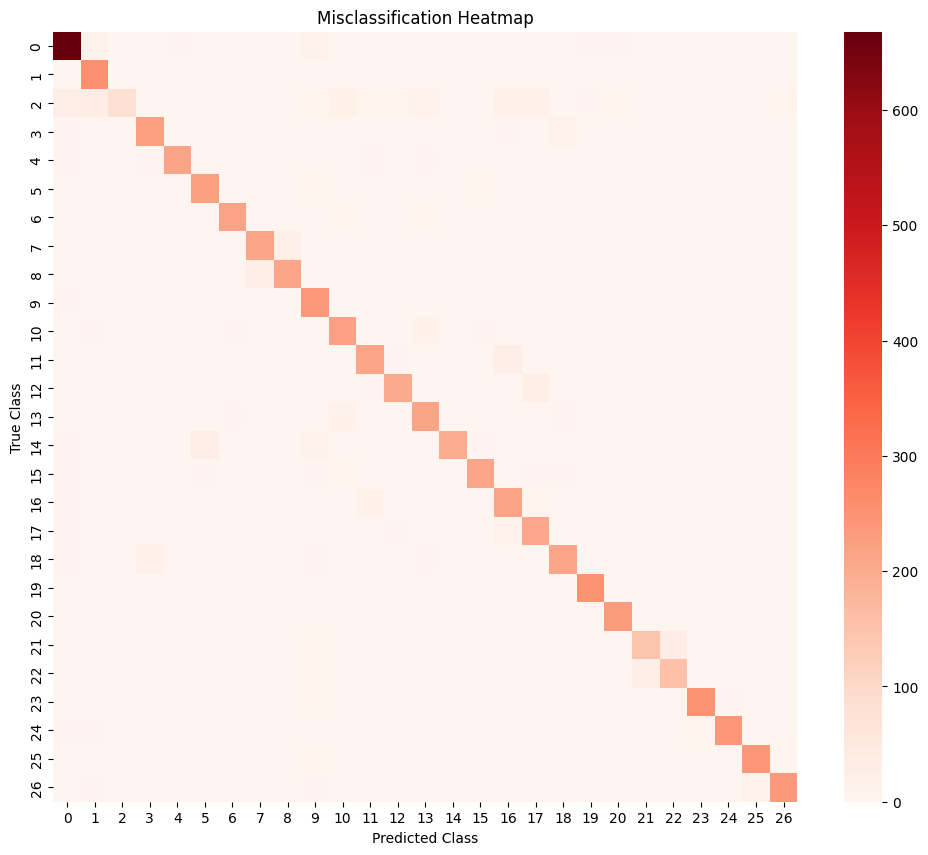

In [21]:
import seaborn as sns

# Extract the confusion matrix
cf_matrix = data['cf']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cf_matrix, annot=False, fmt='d', cmap='Reds')
plt.title('Misclassification Heatmap')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

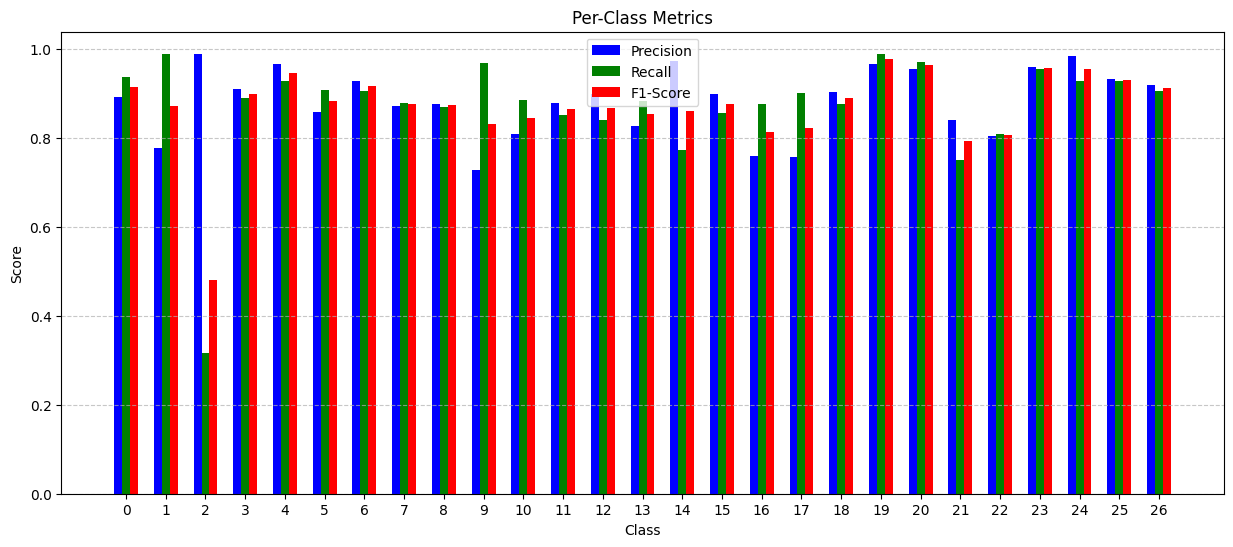

In [22]:
from sklearn.metrics import precision_recall_fscore_support

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(labels, np.argmax(scores, axis=1), average=None)

# Plot precision, recall, and F1-score
x = np.arange(27)
plt.figure(figsize=(15, 6))
plt.bar(x - 0.2, precision, width=0.2, label='Precision', color='blue')
plt.bar(x, recall, width=0.2, label='Recall', color='green')
plt.bar(x + 0.2, f1, width=0.2, label='F1-Score', color='red')
plt.title('Per-Class Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(x)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()